<a href="https://colab.research.google.com/github/2unse0/mining2022/blob/main/%EB%B6%84%EB%A5%98%EA%B3%BC%EC%A0%9C_1916844_%EC%9E%A5%EC%9D%80%EC%84%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 비만여부 예측  
키, 몸무게를 이용하여 BMI 지수를 측정하고 비만여부를 예측하는 것이기에 키, 몸무게를 제외한 수치(허리둘레, 수축기혈압, 이완기혈압, 식전혈당, 총콜레스테롤, 트리글리세라이드, HDL콜레스테롤, LDL콜레스테롤, 혈색소, 혈청크레아티닌, AST, ALT, 감마지티피)들을 독립변수로, 비만여부를 종속변수로 정하였다.

## 0. 데이터 탐색 및 전처리

In [1]:
!pip install mglearn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 31.8 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=c2e281236ab01fa4f31439fda5b0f3a9f86766d9b9b4644f50c0b854615f185f
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [2]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 306 kB 29.8 MB/s 
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0


In [3]:
import mglearn

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%matplotlib inline
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt

In [6]:
health = pd.read_csv("/content/drive/My Drive/ITB/health_data.csv")

print(health.columns)
display(health.info())
display(health.head())

Index(['기준년도', '가입자일련번호', '시도코드', '성별코드', '연령대코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '치석', '데이터공개일자'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)   

None

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


### 1) 새로운 변수 BMI 만들기

#### m 단위의 신장 변수 만들기

In [7]:
health.rename(columns={'신장(5Cm단위)':'신장'}, inplace = True)
health.rename(columns={'체중(5Kg 단위)':'체중'}, inplace = True)

In [8]:
health["신장(m)"] = health["신장"] * 0.01
health

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장,체중,허리둘레,시력(좌),시력(우),...,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,신장(m)
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021,1.65
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021,1.50
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021,1.55
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021,1.60
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021,1.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2020,9996,44,F,13,155,55,83.0,1.2,1.2,...,20.0,21.0,20.0,No,Yes,0,NaN,NaN,12/29/2021,1.55
9996,2020,9997,43,F,11,160,55,77.5,1.0,1.2,...,24.0,22.0,21.0,No,Yes,1,0.0,0.0,12/29/2021,1.60
9997,2020,9998,45,M,12,160,80,93.0,0.6,0.6,...,22.0,27.0,35.0,No,No,0,NaN,NaN,12/29/2021,1.60
9998,2020,9999,27,F,15,155,55,78.0,0.6,1.0,...,26.0,24.0,21.0,No,No,0,NaN,NaN,12/29/2021,1.55


#### BMI 지수 변수 만들기

In [9]:
health["BMI지수"] = health["체중"] / (health["신장(m)"] ** 2)

health

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장,체중,허리둘레,시력(좌),시력(우),...,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,신장(m),BMI지수
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,27.0,21.0,No,No,0,NaN,NaN,12/29/2021,1.65,22.038567
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,15.0,15.0,No,No,0,NaN,NaN,12/29/2021,1.50,28.888889
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,25.0,7.0,No,No,0,NaN,NaN,12/29/2021,1.55,22.892820
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,97.0,72.0,No,No,1,0.0,0.0,12/29/2021,1.60,27.343750
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,17.0,14.0,No,No,0,NaN,NaN,12/29/2021,1.55,20.811655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2020,9996,44,F,13,155,55,83.0,1.2,1.2,...,21.0,20.0,No,Yes,0,NaN,NaN,12/29/2021,1.55,22.892820
9996,2020,9997,43,F,11,160,55,77.5,1.0,1.2,...,22.0,21.0,No,Yes,1,0.0,0.0,12/29/2021,1.60,21.484375
9997,2020,9998,45,M,12,160,80,93.0,0.6,0.6,...,27.0,35.0,No,No,0,NaN,NaN,12/29/2021,1.60,31.250000
9998,2020,9999,27,F,15,155,55,78.0,0.6,1.0,...,24.0,21.0,No,No,0,NaN,NaN,12/29/2021,1.55,22.892820


#### BMI 결과 변수 만들기

18.5 미만이면 저체중  
18.5 이상 23 미만이면 정상  
23 이상 25 미만이면 과체중  
25 이상이면 비만  

In [10]:
BMI결과 = []

In [11]:
for row in health["BMI지수"] :
  if row >= 25:
    BMI결과.append("비만")
  elif row >= 23:
    BMI결과.append("과체중")
  elif row >= 18.5:
    BMI결과.append("정상")
  else :
    BMI결과.append("저체중")


In [12]:
health["BMI결과"] = BMI결과

health


,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장,체중,허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,신장(m),BMI지수,BMI결과
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,21.0,No,No,0,NaN,NaN,12/29/2021,1.65,22.038567,정상
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,15.0,No,No,0,NaN,NaN,12/29/2021,1.50,28.888889,비만
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,7.0,No,No,0,NaN,NaN,12/29/2021,1.55,22.892820,정상
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,72.0,No,No,1,0.0,0.0,12/29/2021,1.60,27.343750,비만
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,14.0,No,No,0,NaN,NaN,12/29/2021,1.55,20.811655,정상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2020,9996,44,F,13,155,55,83.0,1.2,1.2,...,20.0,No,Yes,0,NaN,NaN,12/29/2021,1.55,22.892820,정상
9996,2020,9997,43,F,11,160,55,77.5,1.0,1.2,...,21.0,No,Yes,1,0.0,0.0,12/29/2021,1.60,21.484375,정상
9997,2020,9998,45,M,12,160,80,93.0,0.6,0.6,...,35.0,No,No,0,NaN,NaN,12/29/2021,1.60,31.250000,비만
9998,2020,9999,27,F,15,155,55,78.0,0.6,1.0,...,21.0,No,No,0,NaN,NaN,12/29/2021,1.55,22.892820,정상


In [13]:
print(health['BMI결과'].value_counts())

비만     3697
정상     3645
과체중    2285
저체중     373
Name: BMI결과, dtype: int64


#### 비만여부 변수 만들기
저체중, 정상 = N  
과체중, 비만 = Y

In [14]:
map_BMI결과={"저체중":"N","정상":"N","과체중":"Y","비만":"Y"}
health["비만여부"]=health["BMI결과"].map(map_BMI결과)

In [15]:
health

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장,체중,허리둘레,시력(좌),시력(우),...,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,신장(m),BMI지수,BMI결과,비만여부
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,No,No,0,NaN,NaN,12/29/2021,1.65,22.038567,정상,N
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,No,No,0,NaN,NaN,12/29/2021,1.50,28.888889,비만,Y
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,No,No,0,NaN,NaN,12/29/2021,1.55,22.892820,정상,N
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,No,No,1,0.0,0.0,12/29/2021,1.60,27.343750,비만,Y
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,No,No,0,NaN,NaN,12/29/2021,1.55,20.811655,정상,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2020,9996,44,F,13,155,55,83.0,1.2,1.2,...,No,Yes,0,NaN,NaN,12/29/2021,1.55,22.892820,정상,N
9996,2020,9997,43,F,11,160,55,77.5,1.0,1.2,...,No,Yes,1,0.0,0.0,12/29/2021,1.60,21.484375,정상,N
9997,2020,9998,45,M,12,160,80,93.0,0.6,0.6,...,No,No,0,NaN,NaN,12/29/2021,1.60,31.250000,비만,Y
9998,2020,9999,27,F,15,155,55,78.0,0.6,1.0,...,No,No,0,NaN,NaN,12/29/2021,1.55,22.892820,정상,N


In [16]:
print(health['비만여부'].value_counts())

Y    5982
N    4018
Name: 비만여부, dtype: int64


### 2) 변수이름 변경 및 결측치 제거 전처리

In [17]:
health.rename(columns={'허리둘레':'WAIST'}, inplace = True)
health.rename(columns={'수축기혈압':'BP_HIGH'}, inplace = True)
health.rename(columns={'이완기혈압':'BP_LWST'}, inplace = True)
health.rename(columns={'식전혈당(공복혈당)':'BLDS'}, inplace = True)
health.rename(columns={'총콜레스테롤':'TOT_CHOLE'}, inplace = True)
health.rename(columns={'트리글리세라이드':'TRIGLYCERIDE'}, inplace = True)
health.rename(columns={'HDL콜레스테롤':'HDL_CHOLE'}, inplace = True)
health.rename(columns={'LDL콜레스테롤':'LDL_CHOLE'}, inplace = True)
health.rename(columns={'혈색소':'HMG'}, inplace = True)
health.rename(columns={'혈청크레아티닌':'CREATININE'}, inplace = True)
health.rename(columns={'(혈청지오티)AST':'SGOT_AST'}, inplace = True)
health.rename(columns={'(혈청지오티)ALT':'SGPT_ALT'}, inplace = True)
health.rename(columns={'감마지티피':'GAMMA_GTP'}, inplace = True)
health

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장,체중,WAIST,시력(좌),시력(우),...,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,신장(m),BMI지수,BMI결과,비만여부
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,No,No,0,NaN,NaN,12/29/2021,1.65,22.038567,정상,N
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,No,No,0,NaN,NaN,12/29/2021,1.50,28.888889,비만,Y
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,No,No,0,NaN,NaN,12/29/2021,1.55,22.892820,정상,N
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,No,No,1,0.0,0.0,12/29/2021,1.60,27.343750,비만,Y
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,No,No,0,NaN,NaN,12/29/2021,1.55,20.811655,정상,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2020,9996,44,F,13,155,55,83.0,1.2,1.2,...,No,Yes,0,NaN,NaN,12/29/2021,1.55,22.892820,정상,N
9996,2020,9997,43,F,11,160,55,77.5,1.0,1.2,...,No,Yes,1,0.0,0.0,12/29/2021,1.60,21.484375,정상,N
9997,2020,9998,45,M,12,160,80,93.0,0.6,0.6,...,No,No,0,NaN,NaN,12/29/2021,1.60,31.250000,비만,Y
9998,2020,9999,27,F,15,155,55,78.0,0.6,1.0,...,No,No,0,NaN,NaN,12/29/2021,1.55,22.892820,정상,N


In [18]:
display(health.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   기준년도          10000 non-null  int64  
 1   가입자일련번호       10000 non-null  int64  
 2   시도코드          10000 non-null  int64  
 3   성별코드          10000 non-null  object 
 4   연령대코드(5세단위)   10000 non-null  int64  
 5   신장            10000 non-null  int64  
 6   체중            10000 non-null  int64  
 7   WAIST         10000 non-null  float64
 8   시력(좌)         10000 non-null  float64
 9   시력(우)         10000 non-null  float64
 10  청력(좌)         10000 non-null  int64  
 11  청력(우)         10000 non-null  int64  
 12  BP_HIGH       9912 non-null   float64
 13  BP_LWST       9912 non-null   float64
 14  BLDS          9912 non-null   float64
 15  TOT_CHOLE     4044 non-null   float64
 16  TRIGLYCERIDE  4044 non-null   float64
 17  HDL_CHOLE     4044 non-null   float64
 18  LDL_CHOLE     3977 non-null

None

In [19]:
health.columns

Index(['기준년도', '가입자일련번호', '시도코드', '성별코드', '연령대코드(5세단위)', '신장', '체중', 'WAIST',
       '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', 'BP_HIGH', 'BP_LWST', 'BLDS',
       'TOT_CHOLE', 'TRIGLYCERIDE', 'HDL_CHOLE', 'LDL_CHOLE', 'HMG', '요단백',
       'CREATININE', 'SGOT_AST', 'SGPT_ALT', 'GAMMA_GTP', '흡연상태', '음주여부',
       '구강검진수검여부', '치아우식증유무', '치석', '데이터공개일자', '신장(m)', 'BMI지수', 'BMI결과',
       '비만여부'],
      dtype='object')

In [20]:
health = health[['기준년도', '가입자일련번호', '시도코드', '성별코드', '연령대코드(5세단위)', '신장', '체중',
       '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', 'WAIST', 'BP_HIGH', 'BP_LWST', 'BLDS',
       'TOT_CHOLE', 'TRIGLYCERIDE', 'HDL_CHOLE', 'LDL_CHOLE', 'HMG', 
       'CREATININE', 'SGOT_AST', 'SGPT_ALT', 'GAMMA_GTP','요단백', '흡연상태', '음주여부', '구강검진수검여부', '치아우식증유무', '치석', '데이터공개일자', '신장(m)', 'BMI지수', 'BMI결과',
       '비만여부']]

In [21]:
display(health.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   기준년도          10000 non-null  int64  
 1   가입자일련번호       10000 non-null  int64  
 2   시도코드          10000 non-null  int64  
 3   성별코드          10000 non-null  object 
 4   연령대코드(5세단위)   10000 non-null  int64  
 5   신장            10000 non-null  int64  
 6   체중            10000 non-null  int64  
 7   시력(좌)         10000 non-null  float64
 8   시력(우)         10000 non-null  float64
 9   청력(좌)         10000 non-null  int64  
 10  청력(우)         10000 non-null  int64  
 11  WAIST         10000 non-null  float64
 12  BP_HIGH       9912 non-null   float64
 13  BP_LWST       9912 non-null   float64
 14  BLDS          9912 non-null   float64
 15  TOT_CHOLE     4044 non-null   float64
 16  TRIGLYCERIDE  4044 non-null   float64
 17  HDL_CHOLE     4044 non-null   float64
 18  LDL_CHOLE     3977 non-null

None

In [22]:
health = health.dropna(subset = ["LDL_CHOLE"]) #결측치가 들어있는 행 모두 삭제

In [23]:
display(health.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3977 entries, 0 to 9999
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   기준년도          3977 non-null   int64  
 1   가입자일련번호       3977 non-null   int64  
 2   시도코드          3977 non-null   int64  
 3   성별코드          3977 non-null   object 
 4   연령대코드(5세단위)   3977 non-null   int64  
 5   신장            3977 non-null   int64  
 6   체중            3977 non-null   int64  
 7   시력(좌)         3977 non-null   float64
 8   시력(우)         3977 non-null   float64
 9   청력(좌)         3977 non-null   int64  
 10  청력(우)         3977 non-null   int64  
 11  WAIST         3977 non-null   float64
 12  BP_HIGH       3977 non-null   float64
 13  BP_LWST       3977 non-null   float64
 14  BLDS          3977 non-null   float64
 15  TOT_CHOLE     3977 non-null   float64
 16  TRIGLYCERIDE  3977 non-null   float64
 17  HDL_CHOLE     3977 non-null   float64
 18  LDL_CHOLE     3977 non-null 

None

In [24]:
health.iloc[:, 11:24]

,WAIST,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP
0,72.1,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.1,21.0,27.0,21.0
4,75.2,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,0.7,18.0,17.0,14.0
5,94.0,114.0,72.0,86.0,234.0,183.0,50.0,147.0,16.4,1.1,25.0,32.0,26.0
6,93.0,112.0,73.0,250.0,119.0,265.0,26.0,40.0,15.7,0.7,18.0,20.0,35.0
8,82.0,136.0,65.0,104.0,177.0,61.0,63.0,101.0,13.3,0.7,42.0,48.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,96.0,129.0,79.0,90.0,110.0,132.0,35.0,49.0,14.8,0.8,23.0,24.0,15.0
9989,94.0,132.0,82.0,93.0,172.0,104.0,65.0,86.0,13.5,0.7,19.0,15.0,11.0
9991,70.0,117.0,67.0,121.0,151.0,74.0,54.0,82.0,13.0,1.4,20.0,13.0,16.0
9994,95.0,120.0,66.0,115.0,188.0,125.0,53.0,110.0,15.7,1.1,22.0,21.0,18.0


# 1. 의사결정 나무

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = health.iloc[:, 11:24]  
y = health.loc[:, ["비만여부"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.708


In [26]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0) #위에껀 과적합이라고 판단되어 max_depth를 4로 조정
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.817
시험용 데이터 정확도: 0.802


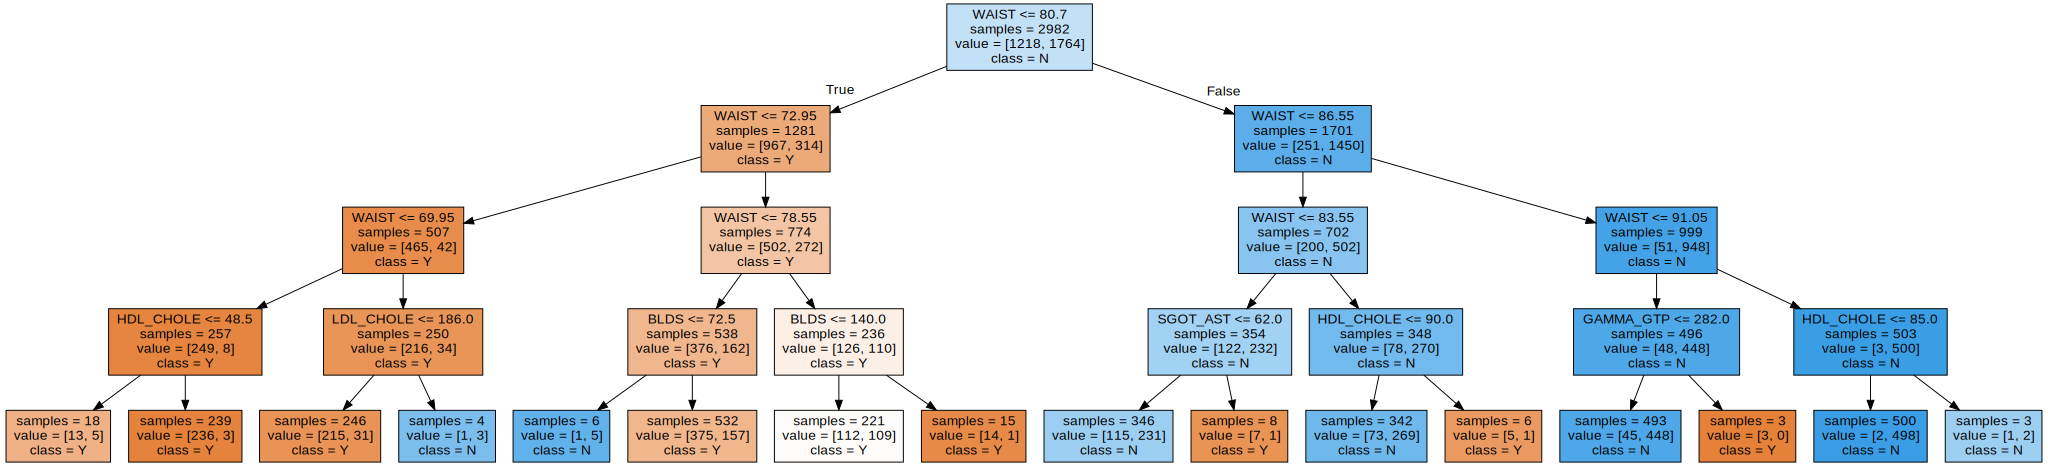

In [27]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree, out_file="tree.dot", class_names=["Y","N"],
                feature_names=health.columns[11:24], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [28]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.9576993  0.         0.         0.01261019 0.         0.
 0.01111259 0.00452118 0.         0.         0.00679236 0.
 0.00726438]


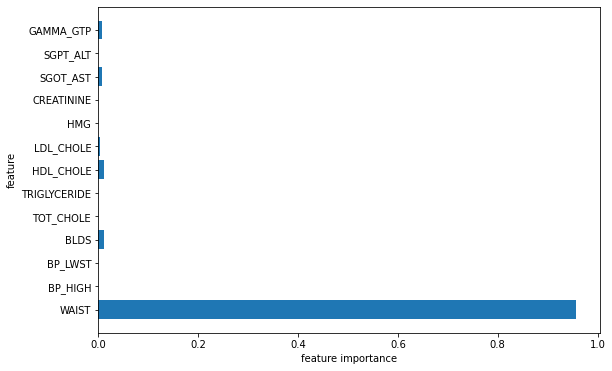

In [29]:
import numpy as np

def plot_feature_importances_health(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(health.columns[11:24])  
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), health.columns[11:24])  
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) 

plot_feature_importances_health(tree) 

In [30]:
res = pd.DataFrame(result)
res["name"] = health.columns[11:24]
display(res.info())

display(res.sort_values(by='name'))  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       13 non-null     float64
 1   name    13 non-null     object 
dtypes: float64(1), object(1)
memory usage: 336.0+ bytes


None

,0,name
3,0.012610,BLDS
1,0.000000,BP_HIGH
2,0.000000,BP_LWST
9,0.000000,CREATININE
12,0.007264,GAMMA_GTP
6,0.011113,HDL_CHOLE
8,0.000000,HMG
7,0.004521,LDL_CHOLE
10,0.006792,SGOT_AST
11,0.000000,SGPT_ALT


# 2. 랜덤 포레스트


In [31]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.812


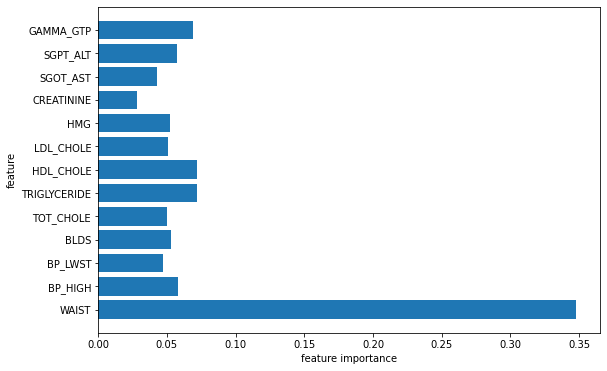

In [32]:
plot_feature_importances_health(forest) #의사결정 나무보다 많은 변수들이 사용됨

# 3. 그래디언트 부스팅

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(random_state=0)

In [34]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.846
시험용 데이터 세트 정확도: 0.803


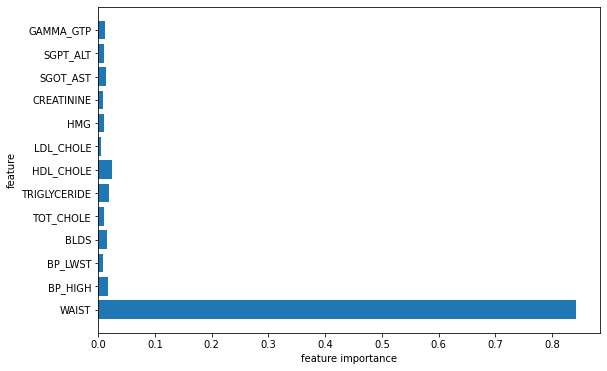

In [35]:
plot_feature_importances_health(gbrt)

In [36]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train) 

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


학습 데이터 세트 정확도: 0.816
시험용 데이터 세트 정확도: 0.813


In [37]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.04)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


학습 데이터 세트 정확도: 0.825
시험용 데이터 세트 정확도: 0.814


In [47]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth = 1, learning_rate=0.04)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


학습 데이터 세트 정확도: 0.811
시험용 데이터 세트 정확도: 0.813


그리드서치   
그래디언트부스팅의 최적의 max_depth, learning_rate를 알고 싶어 진행

In [38]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[1,2,3], 'learning_rate':[0.1,0.08, 0.06, 0.04, 0.02]}

In [39]:
init_gbrt = GradientBoostingClassifier(random_state=0)
grid_gbrt = GridSearchCV(init_gbrt, param_grid=parameters, cv=3, refit=True) 
print(grid_gbrt) 

grid_gbrt.fit(X_train, y_train)


scores_df = pd.DataFrame(grid_gbrt.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.1, 0.08, 0.06, 0.04, 0.02],
                         'max_depth': [1, 2, 3]})


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'learning_rate': 0.1, 'max_depth': 1}",0.806170,7,0.799799,0.806841,0.811871
1,"{'learning_rate': 0.1, 'max_depth': 2}",0.802146,12,0.799799,0.808853,0.797787
2,"{'learning_rate': 0.1, 'max_depth': 3}",0.796110,15,0.787726,0.806841,0.793763
3,"{'learning_rate': 0.08, 'max_depth': 1}",0.806170,7,0.798793,0.807847,0.811871
4,"{'learning_rate': 0.08, 'max_depth': 2}",0.804829,10,0.803823,0.806841,0.803823
5,"{'learning_rate': 0.08, 'max_depth': 3}",0.800134,14,0.797787,0.804829,0.797787
6,"{'learning_rate': 0.06, 'max_depth': 1}",0.806506,6,0.799799,0.805835,0.813883
7,"{'learning_rate': 0.06, 'max_depth': 2}",0.804158,11,0.801811,0.805835,0.804829
8,"{'learning_rate': 0.06, 'max_depth': 3}",0.801140,13,0.793763,0.808853,0.800805
9,"{'learning_rate': 0.04, 'max_depth': 1}",0.809188,1,0.808853,0.806841,0.811871


In [46]:
print('GridSearchCV 최적 파라미터:', grid_gbrt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_gbrt.best_score_))

GridSearchCV 최적 파라미터: {'learning_rate': 0.04, 'max_depth': 1}
GridSearchCV 최고 정확도: 0.8092


In [45]:
print("시험용 데이터 세트 정확도: {:.3f}".format(grid_gbrt.score(X_test, y_test)))

시험용 데이터 세트 정확도: 0.813


# 4. 분류모델 평가 - ROC곡선과 AUC

[[0.33236994 0.66763006]
 [0.21345029 0.78654971]
 [0.21345029 0.78654971]
 ...
 [0.33236994 0.66763006]
 [0.21345029 0.78654971]
 [0.09127789 0.90872211]]


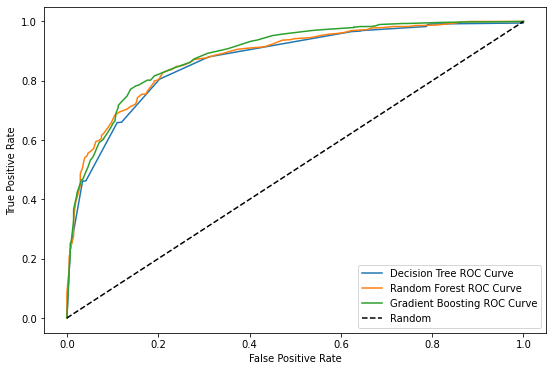

In [48]:
from sklearn.metrics import roc_auc_score, roc_curve

print(tree.predict_proba(X_test))

fpr_dt, tpr_dt, cutoff_dt = roc_curve(y_test, tree.predict_proba(X_test)[:,1], pos_label="Y")
fpr_rf, tpr_rf, cutoff_rf = roc_curve(y_test, forest.predict_proba(X_test)[:,1], pos_label="Y")
fpr_gbrt, tpr_gbrt, cutoff_gbrt = roc_curve(y_test, grid_gbrt.predict_proba(X_test)[:,1], pos_label="Y")

plt.plot(fpr_dt, tpr_dt, label="Decision Tree ROC Curve")
plt.plot(fpr_rf, tpr_rf, label="Random Forest ROC Curve")
plt.plot(fpr_gbrt, tpr_gbrt, label="Gradient Boosting ROC Curve")
plt.plot([0,1], [0, 1], "k--", label ="Random") 

plt.xlabel("False Positive Rate") 
plt.ylabel("True Positive Rate")

plt.legend(loc=4)
plt.show() 

In [42]:
auc_dt = roc_auc_score(y_test, tree.predict_proba(X_test)[:, 1])
auc_rf = roc_auc_score(y_test, forest.predict_proba(X_test)[:, 1])
auc_gbrt = roc_auc_score(y_test, grid_gbrt.predict_proba(X_test)[:, 1])
print("Decision Tree의 AUC: {:.3f}".format(auc_dt))
print("Random Forest의 AUC: {:.3f}".format(auc_rf))
print("Gradient Boosting의 AUC: {:.3f}".format(auc_gbrt))

Decision Tree의 AUC: 0.870
Random Forest의 AUC: 0.881
Gradient Boosting의 AUC: 0.891


그래디언트 부스팅의 AUC가 가장 크기 때문에 그래디언트부스팅 모델을 선택할 것이다.

### 인사이트
허리둘레가 복부비만으로 이어져 BMI 수치에 큰 영향을 미칠 것으로 예상되어 허리둘레는 중요 변수라고 예상하였다.
예상대로 허리둘레가 가장 큰 중요변수였으며 이 외에도 콜레스테롤, 공복혈당, 트리글리세라이드, AST, 감마지티피의 수치가 비만여부에 영향을 미쳤다. AST와 감마지티피의 경우 음주, 약물로 인해 수치가 높게 나오는 경우가 많다고 생각하여 비만 여부에 중요 변수로 작용할 것이라고 생각치 못했으나 음주, 약물과 더불에 비만에도 복합적으로 영향을 받는 것 같다.